In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score
from collections import Counter
from helpers import resample_data, svd_reduce_and_combine, get_submission_ready

# Data Imports

In [42]:
X_train_full = pd.read_csv("data/components/X_train.csv")
y_train_full = pd.read_csv("data/components/y_train.csv")

In [23]:
X_train = pd.read_csv("data/components/half_X_train.csv")
y_train = pd.read_csv("data/components/half_y_train.csv")
X_test = pd.read_csv("data/components/X_test.csv")
y_test = pd.read_csv("data/components/y_test.csv")
submission = pd.read_csv("data/components/submission.csv")

In [25]:
X_train_qt = pd.read_csv("data/components/quarter_X_train.csv")
y_train_qt = pd.read_csv("data/components/quarter_y_train.csv")

In [51]:
# EVALUATION FUNCTION
def evaluate(y_pred):
    accuracy = accuracy_score(y_test, y_pred) * 100

    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"prediction set: {Counter(y_pred)}")

## Begin 

In [109]:
def cv(x_train, y_train):
    md = np.arange(6, 21, 2)
    scores = [] 
    
    for maxDepth in md: 
        print("Testing max_depth:", maxDepth)
        clf = DecisionTreeClassifier(max_depth=maxDepth)
        
        # Perform 10-fold cross-validation and compute the mean accuracy
        score = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
        print(f"Mean score: {score.mean()}")
        scores.append(score.mean())
    
    # Plot cross-validated accuracy against max_depth values
    plt.plot(md, scores, marker='o')
    plt.xlabel('Max Depth for Decision Tree Classifier')
    plt.ylabel('Cross-Validated Accuracy')
    plt.title('Decision Tree Classifier Performance by Max Depth')
    plt.show()
    
    # Find the best max_depth based on the highest accuracy
    max_value = max(scores)
    best_depth = md[scores.index(max_value)]
    
    print(f"Best accuracy score: {max_value:.4f} with max_depth: {best_depth}")
    return best_depth, max_value

In [33]:
X_train_qt_num = X_train_qt[['Unhelpful', 'SummarySentiment', 'CleanedTextSentiment', 'ProductAvgScore', 'UserAvgScore']]
X_train_qt_num.head(1)

,Unhelpful,SummarySentiment,CleanedTextSentiment,ProductAvgScore,UserAvgScore
0,3,0.6249,0.0,4.461538,3.0


Testing max_depth: 3
Mean score: 0.5765034752633573
Testing max_depth: 4
Mean score: 0.5836399658723012
Testing max_depth: 5
Mean score: 0.5915405767423002
Testing max_depth: 6
Mean score: 0.5984952793205371
Testing max_depth: 7
Mean score: 0.601242147915201
Testing max_depth: 8
Mean score: 0.6046858440735047
Testing max_depth: 9
Mean score: 0.6062242262862217
Testing max_depth: 10
Mean score: 0.6069479876091654
Testing max_depth: 11
Mean score: 0.6055442607081836
Testing max_depth: 12
Mean score: 0.6032181731208774
Testing max_depth: 13
Mean score: 0.5989733126405586
Testing max_depth: 14
Mean score: 0.5943446928902925
Testing max_depth: 15
Mean score: 0.5883527325999937
Testing max_depth: 16
Mean score: 0.5815225700458654
Testing max_depth: 17
Mean score: 0.5750526129237837
Testing max_depth: 18
Mean score: 0.5673573253383207
Testing max_depth: 19
Mean score: 0.5618366491770834


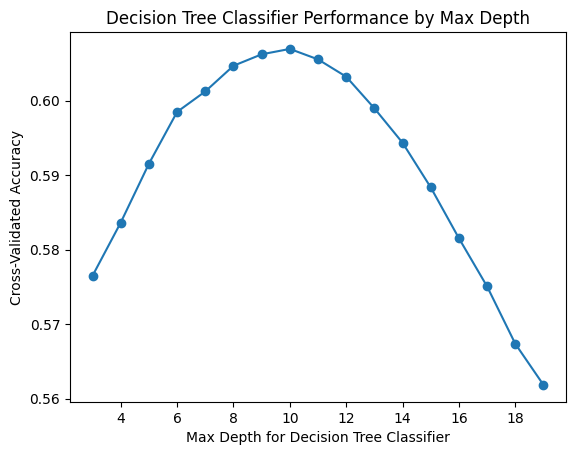

Best accuracy score: 0.6069 with max_depth: 10


(np.int64(10), np.float64(0.6069479876091654))

In [40]:
md = cv(X_train_qt_num, y_train_qt)
md

In [43]:
X_train_full_num = X_train_full[['Unhelpful', 'SummarySentiment', 'CleanedTextSentiment', 'ProductAvgScore', 'UserAvgScore']]
X_train_full_num.head(1)

,Unhelpful,SummarySentiment,CleanedTextSentiment,ProductAvgScore,UserAvgScore
0,0,-0.5719,-0.8781,3.2,3.781513


In [45]:
X_test_num = X_test[['Unhelpful', 'SummarySentiment', 'CleanedTextSentiment', 'ProductAvgScore', 'UserAvgScore']]
X_test_num.head(1)

,Unhelpful,SummarySentiment,CleanedTextSentiment,ProductAvgScore,UserAvgScore
0,0,0.0,0.7269,3.448276,5.0


In [44]:
dtc = DecisionTreeClassifier(max_depth=10).fit(X_train_full_num, y_train_full)
dtc

DecisionTreeClassifier(max_depth=10)

In [52]:
y_pred = dtc.predict(X_test_num)
evaluate(y_pred)

[[  9712   1318   2902    790   3516]
 [  4279   1615   5111   2276   4655]
 [  2442   1496   8139   7998  15141]
 [  1322    792   6561  14266  44104]
 [  1517    690   5616  12753 138056]]
Accuracy: 57.83%
prediction set: Counter({np.float64(5.0): 205472, np.float64(4.0): 38083, np.float64(3.0): 28329, np.float64(1.0): 19272, np.float64(2.0): 5911})


## Use TF-IDF Components

In [81]:
X_train_tfidf = pd.read_csv("data/components/tfidf/X_train_full.csv")
X_test_tfidf  = pd.read_csv("data/components/tfidf/X_test_full.csv")
submission_tfidf = pd.read_csv("data/components/tfidf/submission_full.csv")

In [57]:
y_train = pd.read_csv("data/components/y_train.csv")
y_test = pd.read_csv("data/components/y_test.csv")

In [82]:
from helpers import resample_data, svd_reduce_and_combine, get_submission_ready

In [83]:
X_train_tfidf_downsized, y_train_tfidf = resample_data(0.5, X_train_tfidf, y_train)

new training size is (594132, 1258)


Testing max_depth: 3
Mean score: 0.5759124245931186
Testing max_depth: 4
Mean score: 0.5851729962495691
Testing max_depth: 5
Mean score: 0.5944268258258958
Testing max_depth: 6
Mean score: 0.6011004285935516
Testing max_depth: 7
Mean score: 0.6060353588616305
Testing max_depth: 8
Mean score: 0.6110881102185706
Testing max_depth: 9
Mean score: 0.61522859954779
Testing max_depth: 10
Mean score: 0.6179821986070339
Testing max_depth: 11
Mean score: 0.619337118352501
Testing max_depth: 12
Mean score: 0.6192108801239322
Testing max_depth: 13
Mean score: 0.6189483146969967
Testing max_depth: 14
Mean score: 0.6177785372655398
Testing max_depth: 15
Mean score: 0.6164404548873383
Testing max_depth: 16
Mean score: 0.6149828679470078
Testing max_depth: 17
Mean score: 0.6135050796674106
Testing max_depth: 18
Mean score: 0.611497108216103
Testing max_depth: 19
Mean score: 0.6092467662747953


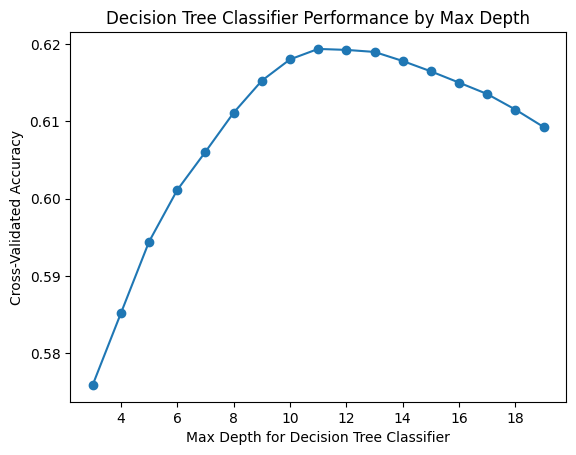

Best accuracy score: 0.6193 with max_depth: 11


(np.int64(11), np.float64(0.619337118352501))

In [71]:
md = cv(X_train_tfidf_downsized, y_train_tfidf)
md

In [88]:
clf = DecisionTreeClassifier(max_depth=11)
data = clf.fit(X_train_tfidf_downsized, y_train_tfidf)
submission_y = clf.predict(submission_tfidf)
submission_y

array([4., 5., 4., ..., 4., 5., 5.])

In [89]:
get_submission_ready(submission_y)

## Apply SVD

In [90]:
X_train_tfidf_downsized

,ability,able,absolutely,across,act,acted,acting,action,actor,actors,...,york,you,young,younger,Helpful,Unhelpful,SummarySentiment,CleanedTextSentiment,ProductAvgScore,UserAvgScore
0,0.0,0.0,0.0,0.0,0.0,0.0,0.133075,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0.5719,0.9252,3.737024,4.480000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.097662,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,3,0,0.0000,-0.3415,3.778689,3.921109
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,7,3,0.0000,0.9906,3.621483,4.222222
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0.0000,0.6369,4.320611,4.750000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.105412,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0.7351,0.9594,3.571429,3.595978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594127,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,2,0,0.0000,0.6925,4.400000,3.540189
594128,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,2,1,0.0000,-0.9614,3.870968,4.630262
594129,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,-0.3865,-0.8686,2.100000,3.333333
594130,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,2,4,0.1779,-0.4173,3.400000,3.666667


In [101]:
X_train_svd = svd_reduce_and_combine(X_train_tfidf_downsized, end=1251, components=600)
X_train_svd.head(1)

,SVD_1,SVD_2,SVD_3,SVD_4,SVD_5,SVD_6,SVD_7,SVD_8,SVD_9,SVD_10,...,SVD_597,SVD_598,SVD_599,SVD_600,Helpful,Unhelpful,SummarySentiment,CleanedTextSentiment,ProductAvgScore,UserAvgScore
0,0.244557,-0.070781,-0.036483,-0.03326,-0.026315,-0.013437,-0.037419,-0.033106,0.061671,-0.055968,...,-0.020717,-0.003645,-0.030696,-0.007368,0.0,0.0,0.5719,0.9252,3.737024,4.48


In [102]:
def resample_data(size, X_train, y_train):
    """ 
        Resample the training data to size (0.5 to half the data, 0.25 to quarter it, etc.)
    """

    # recombine training data
    X_train['Score'] = y_train

    ## true to data
    # desired_ratio = {
    #     1: 0.06,
    #     2: 0.06,
    #     3: 0.11,
    #     4: 0.22,
    #     5: 0.55
    # }
    
    ## a little less skewed
    # desired_ratio = {
    #     1: 0.10,
    #     2: 0.10,
    #     3: 0.20,
    #     4: 0.25,
    #     5: 0.35
    # }
    # equal
    desired_ratio = {
        1: 0.2,
        2: 0.2,
        3: 0.2,
        4: 0.2,
        5: 0.2
    }

    # half the total training size
    total_size = size * len(X_train)
    balanced_data = pd.DataFrame()

    # loop through each Score category and resample it
    for score, ratio in desired_ratio.items():

        # determine how many samples we need for this score category
        target_count = int(total_size * ratio)
        
        # get all the rows that belong to the current Score category
        score_data = X_train[X_train['Score'] == score]
        
        if len(score_data) > target_count:
            # if the class is overrepresented, perform undersampling (probably this one since we're downsizing)
            score_resampled = resample(score_data, replace=False, n_samples=target_count, random_state=123)
        else:
            score_resampled = resample(score_data, replace=True, n_samples=target_count, random_state=123)
        
        # append the resampled data to the balanced_data DataFrame
        balanced_data = pd.concat([balanced_data, score_resampled])
        
    balanced_data = balanced_data.sample(frac=1, random_state=123).reset_index(drop=True)

    # reassign
    y_train = balanced_data['Score']
    X_train = balanced_data.drop(columns=['Score'], axis=1)

    print(f"new training size is {balanced_data.shape}")

    return X_train, y_train

In [112]:
## TRY BALANCED DATA - nvm doesn't work never doing this again
X_train_svd_balanced, y_train_balanced = resample_data(0.1, X_train_svd, y_train)

new training size is (59410, 607)


In [113]:
X_train_svd_balanced.head(2)

,SVD_1,SVD_2,SVD_3,SVD_4,SVD_5,SVD_6,SVD_7,SVD_8,SVD_9,SVD_10,...,SVD_597,SVD_598,SVD_599,SVD_600,Helpful,Unhelpful,SummarySentiment,CleanedTextSentiment,ProductAvgScore,UserAvgScore
0,0.230426,0.003137,0.049135,-0.002765,0.072753,-0.030076,-0.041026,-0.000612,0.103429,-0.154740,...,-0.005159,0.003649,0.002422,0.012913,0.0,0.0,0.3612,0.8481,3.151515,4.857143
1,0.104024,0.082331,0.035433,0.022212,0.043683,0.134129,-0.047443,-0.016721,-0.061949,0.035533,...,0.001781,0.006012,0.003143,0.004134,0.0,0.0,0.4404,0.7096,4.258065,5.000000


Testing max_depth: 6
Mean score: 0.19838411041912135
Testing max_depth: 8
Mean score: 0.20072378387476855
Testing max_depth: 10
Mean score: 0.20417438141726985
Testing max_depth: 12
Mean score: 0.20366941592324522
Testing max_depth: 14
Mean score: 0.20363575155697694
Testing max_depth: 16
Mean score: 0.2008079447904393
Testing max_depth: 18
Mean score: 0.2014980642989396
Testing max_depth: 20
Mean score: 0.2008752735229759


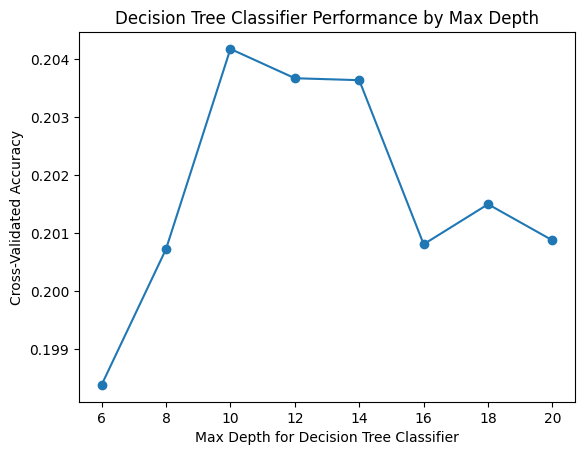

Best accuracy score: 0.2042 with max_depth: 10


(np.int64(10), np.float64(0.20417438141726985))

: 

In [114]:
md = cv(X_train_svd_balanced, y_train_balanced)
md